In [33]:
!pip install keras

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Flatten

In [36]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [37]:
X_test.shape

(10000, 28, 28)

In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

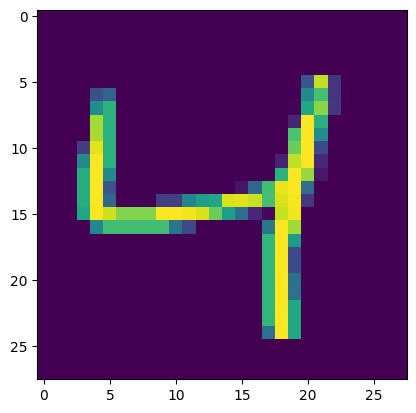

In [39]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [40]:
X_train = X_train/255
X_test = X_test/255

In [41]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [42]:
model = models.Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [45]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2805 - accuracy: 0.9186 - val_loss: 0.1569 - val_accuracy: 0.9514
Epoch 2/25
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1196 - accuracy: 0.9641 - val_loss: 0.1187 - val_accuracy: 0.9649
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0832 - accuracy: 0.9749 - val_loss: 0.0981 - val_accuracy: 0.9709
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0619 - accuracy: 0.9805 - val_loss: 0.0999 - val_accuracy: 0.9702
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0479 - accuracy: 0.9846 - val_loss: 0.1035 - val_accuracy: 0.9712
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.1132 - val_accuracy: 0.9689
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.1059 - val_accura

In [46]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [47]:
y_pred = y_prob.argmax(axis=1)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9746

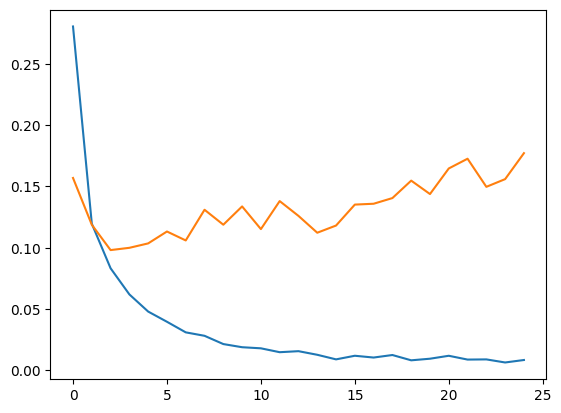

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

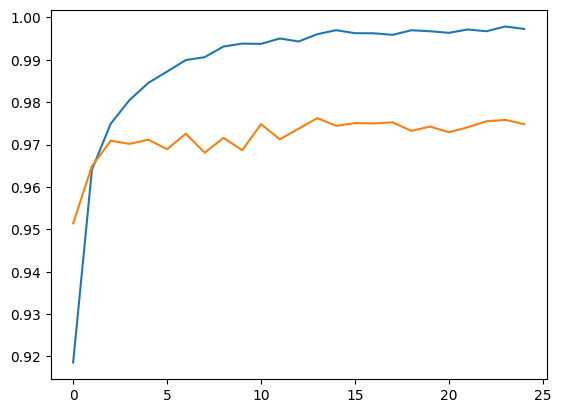

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

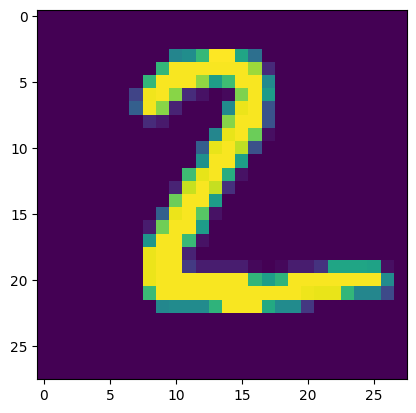

In [51]:
plt.imshow(X_test[1])

In [52]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([2])